### Moving Average Filter

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [58]:
t = np.linspace(0, 1, 500)
clean_signal = np.sin(2 * np.pi * 5 * t)
noise = np.random.normal(0, 0.5, 500)
x = clean_signal + noise

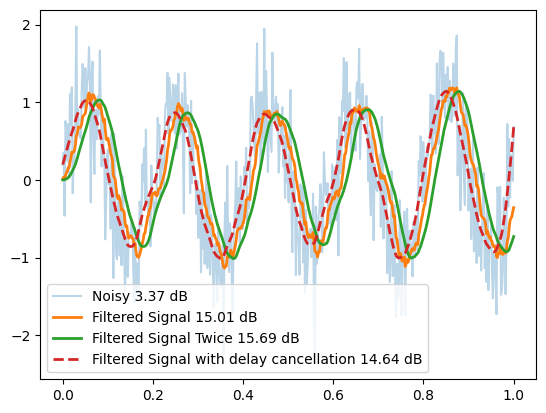

In [ ]:
# Filter Setup
M = 15 #window size
b = np.ones(M) / M #num
a = 1 #den

y = signal.lfilter(b, a, x)
z = signal.lfilter(b, a, y)
y_nd = signal.filtfilt(b, a, x)

def get_snr(clean, filtered):
    noise_est = clean - filtered
    snr = 10 * np.log10(np.sum(clean**2) / np.sum(noise_est**2))
    return snr

# snr is calculated by aligning the signal to remove group delay
delay_single = (M-1)//2
delay_double = M - 1

snr_x = get_snr(clean_signal, x)
snr_y = get_snr(clean_signal[:-delay_single], y[delay_single:])
snr_z = get_snr(clean_signal[:-delay_double], z[delay_double:])
snr_y_nd = get_snr(clean_signal, y_nd)

plt.plot(t, x, label=f"Noisy {snr_x:.2f} dB", alpha=0.3)
plt.plot(t, y, label=f"Filtered Signal {snr_y:.2f} dB", linewidth=2)
plt.plot(t, z, label=f"Filtered Signal Twice {snr_z:.2f} dB", linewidth=2)
plt.plot(t, y_nd, label=f"Filtered Signal with delay cancellation {snr_y_nd:.2f} dB", linewidth=2, linestyle='--')
plt.legend()
plt.show()

The moving average filter introduces the phase delay in the frequencies. The phase response is linear so each freq component gets shifted by the same amount.

Group delay of (M-1)/2 where M is the window size

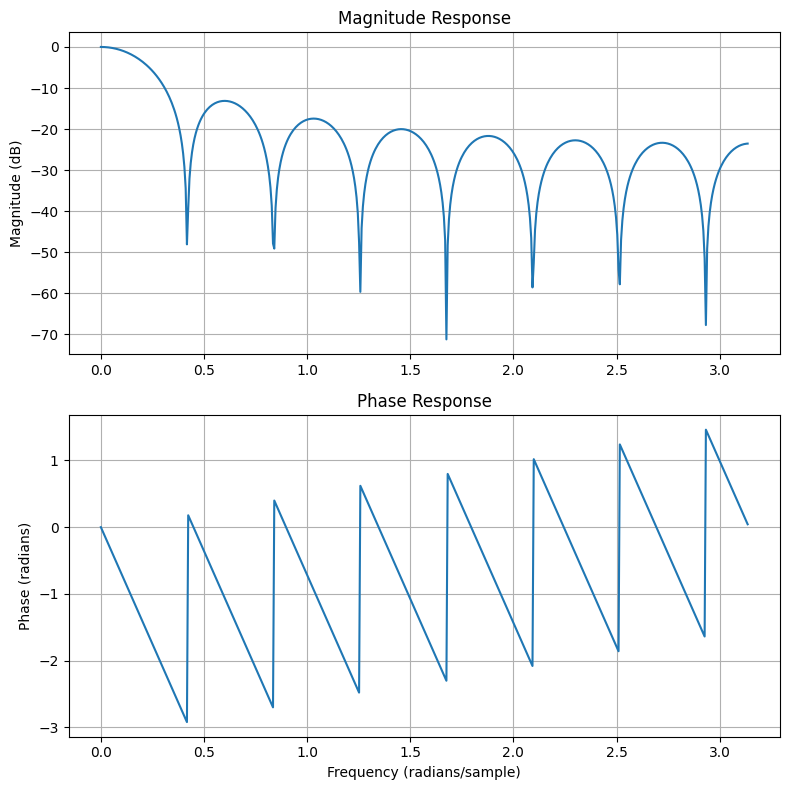

In [60]:
#frequency reponse
w,h = signal.freqz(b,a)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Magnitude Response (dB)
ax1.plot(w, 20 * np.log10(np.abs(h) + 1e-12))
ax1.set_title("Magnitude Response")
ax1.set_ylabel("Magnitude (dB)")
ax1.grid()

# Phase Response (Radians)
ax2.plot(w, np.angle(h))
ax2.set_title("Phase Response")
ax2.set_xlabel("Frequency (radians/sample)")
ax2.set_ylabel("Phase (radians)")
ax2.grid()

plt.tight_layout()
plt.show()

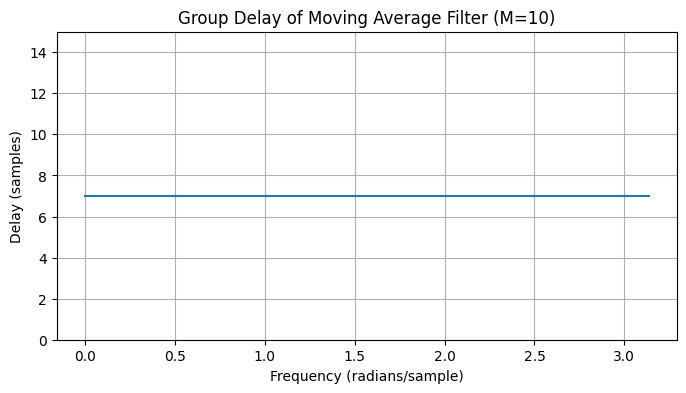

In [61]:
w, gd = signal.group_delay((b, a))

plt.figure(figsize=(8, 4))
plt.plot(w, gd)
plt.title("Group Delay of Moving Average Filter (M=10)")
plt.xlabel("Frequency (radians/sample)")
plt.ylabel("Delay (samples)")
plt.ylim(0, M)
plt.grid()
plt.show()